In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams['font.size'] = '17'

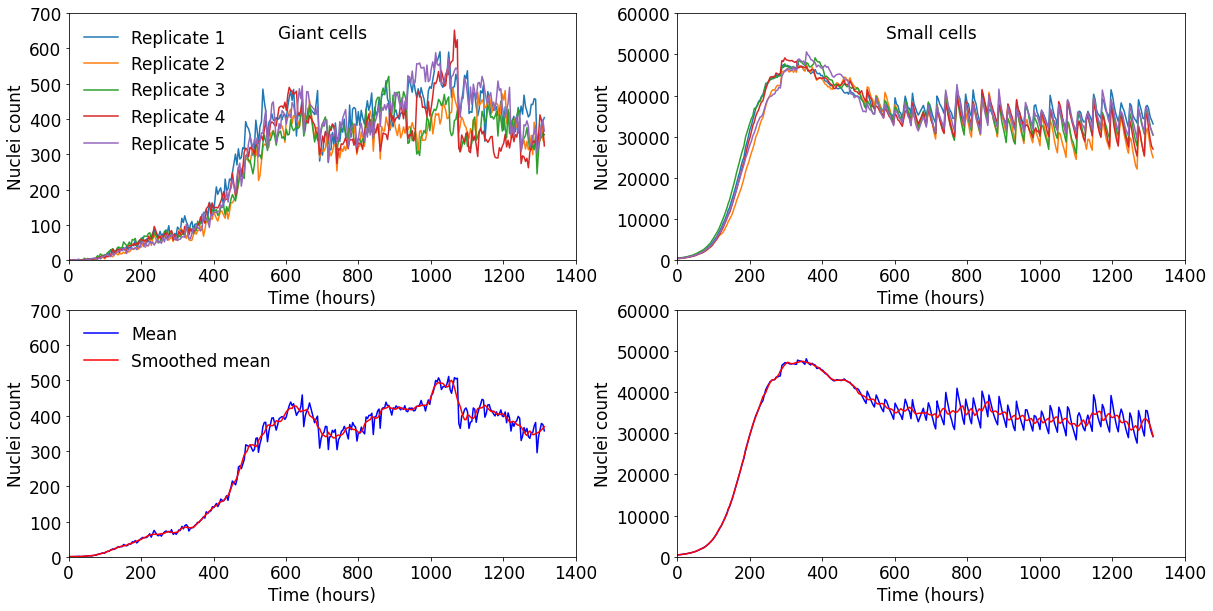

In [2]:
giant_data = np.loadtxt('./Data/giant.csv')
small_data = np.loadtxt('./Data/small.csv')
mean_data = np.mean(np.delete(giant_data,0,1),axis=1)
giant_mean = np.stack([np.around(giant_data.T[0]), mean_data])
mean_data = np.mean(np.delete(small_data,0,1),axis=1)
small_mean = np.stack([np.around(small_data.T[0]), mean_data])
small_smooth = savgol_filter(small_mean[1], 13, 3) # window size 51, polynomial order 3
giant_smooth = savgol_filter(giant_mean[1], 13, 3) # window size 51, polynomial order 3
fig, axes = plt.subplots(2,2, figsize=(20, 10))
ax1 = axes[0][0]
for i in range(1,len(giant_data.T)):
    ax1.plot(giant_data.T[0], giant_data.T[i],'-',label='Replicate '+str(i))
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Nuclei count');
ax1.set_xlim((0,1400))
ax1.set_ylim((0,700))
ax1.text(0.5,0.9,'Giant cells',horizontalalignment='center',transform=ax1.transAxes)
ax1.legend(loc='upper left',ncol=1,fancybox=False, shadow=False, frameon=False)
ax2 = axes[0][1]
for i in range(1,len(small_data.T)):
    ax2.plot(small_data.T[0], small_data.T[i],'-',label='Replicate '+str(i))
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Nuclei count');
ax2.set_xlim((0,1400))
ax2.set_ylim((0,60000))
ax2.text(0.5,0.9,'Small cells',horizontalalignment='center',transform=ax2.transAxes)
ax3 = axes[1][0]
ax3.plot(giant_mean[0], giant_mean[1],'-',color='blue',label='Mean')
ax3.plot(giant_mean[0], giant_smooth,'-',color='red',label='Smoothed mean')
ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Nuclei count');
ax3.set_xlim((0,1400))
ax3.set_ylim((0,700))
ax3.legend(loc='upper left',ncol=1,fancybox=False, shadow=False, frameon=False)
ax4 = axes[1][1]
ax4.plot(small_mean[0], small_mean[1],'-',color='blue')
ax4.plot(small_mean[0], small_smooth,'-',color='red')
ax4.set_xlabel('Time (hours)')
ax4.set_ylabel('Nuclei count');
ax4.set_xlim((0,1400))
ax4.set_ylim((0,60000))
plt.savefig('cells_data.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

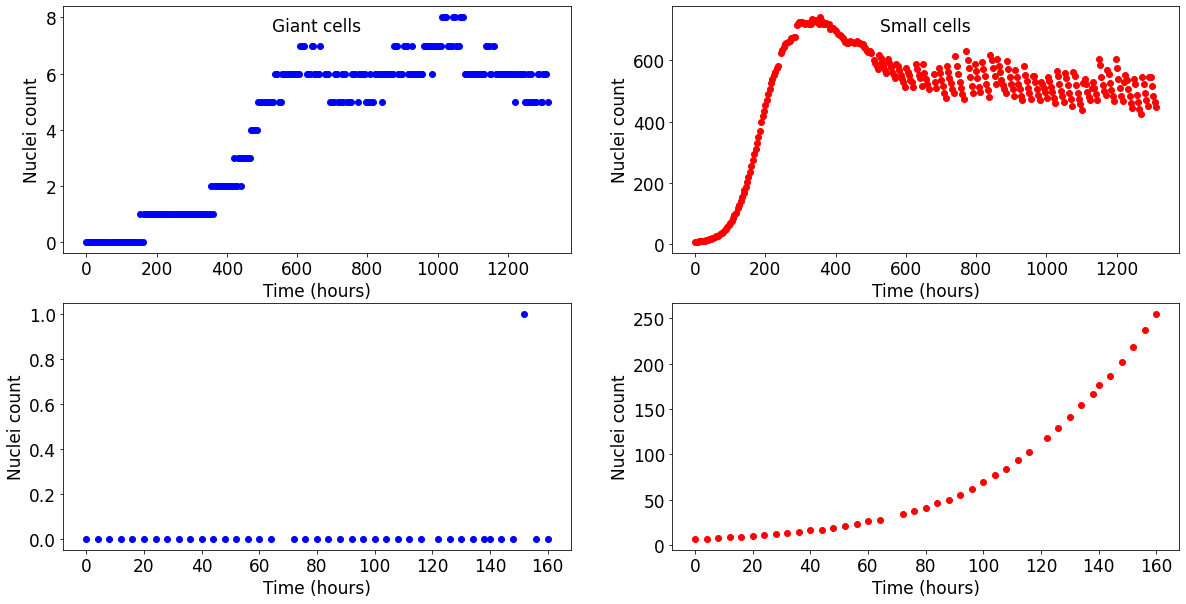

In [3]:
#model_data = np.loadtxt('cells_data1.txt')
giant_mreg = np.stack([giant_mean[0], np.around(giant_mean[1]/65)])
small_mreg = np.stack([small_mean[0], np.around(small_mean[1]/65)])
cropped_giant = np.stack([giant_mreg[0][0:40],giant_mreg[1][0:40]])
cropped_small = np.stack([small_mreg[0][0:40],small_mreg[1][0:40]])
np.savetxt('./Data/small_cells.dat', cropped_small.T, delimiter=' ',fmt='%d')
np.savetxt('./Data/full_small_cells.dat', small_mreg.T, delimiter=' ',fmt='%d')
np.savetxt('./Data/full_giant_cells.dat', giant_mreg.T, delimiter=' ',fmt='%d')
fig, axes = plt.subplots(2,2, figsize=(20,10))
ax1 = axes[0][0]
ax1.plot(giant_mreg[0], giant_mreg[1],'o',color='blue')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Nuclei count');
ax1.text(0.5,0.9,'Giant cells',horizontalalignment='center',transform=ax1.transAxes)
ax2 = axes[0][1]
#ax2.plot(model_data.T[0], model_data.T[3]+model_data.T[4]+model_data.T[5]+model_data.T[6],'-',color='red')
ax2.plot(small_mreg[0], small_mreg[1],'o',color='red')
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Nuclei count');
ax2.text(0.5,0.9,'Small cells',horizontalalignment='center',transform=ax2.transAxes)
ax3 = axes[1][0]
ax3.plot(cropped_giant[0], cropped_giant[1],'o',color='blue')
ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Nuclei count');
ax4 = axes[1][1]
ax4.plot(cropped_small[0], cropped_small[1],'o',color='red')
ax4.set_xlabel('Time (hours)')
ax4.set_ylabel('Nuclei count');
plt.savefig('calibration_data.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()